# DATA LOADING

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('IMDB Dataset.csv')

In [3]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
data['review'][96]

"My guess would be this was originally going to be at least two parts, and thus at least a quarter longer, because otherwise how can one explain its confused, abbreviated storyline. I was never completely lost, but I was often partially lost and usually unclear on character motivation. The movie feels as though joining plot points were dropped to squeeze it into its time slot.<br /><br />If it were longer, it might make more sense, but it still wouldn't be much good. The movie's most interesting idea is of the war between Zeus and Hera as being a war between the male and female, but the movie drops the ball on this, making Hera's followers fairly horrible while not being clear on what Zeus' followers do or believe. The movie is also interesting because you don't see the gods and there's no real certainty that they exist. So it's got a couple of intriguing ideas, but it doesn't do anything useful with them.<br /><br />Bad dialog, cardboard characters, and one interesting scene involving

In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
!pip install matplotlib

In [7]:
import matplotlib.pyplot as plt

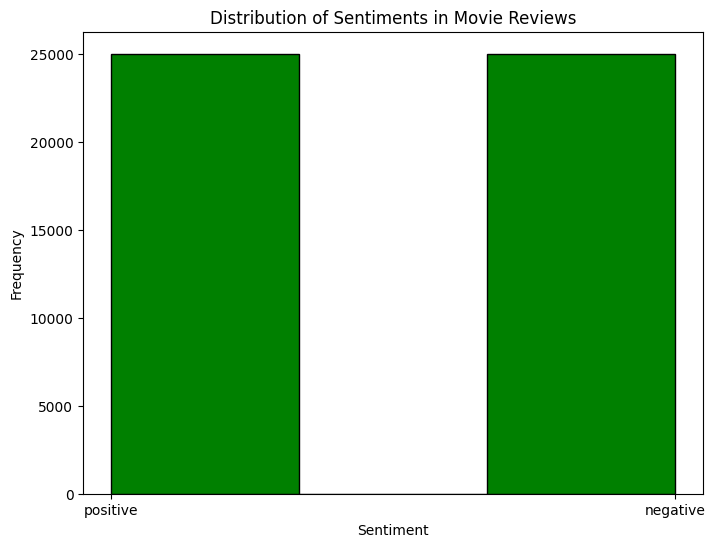

In [8]:


# Assuming 'sentiment' is the column you want to plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Plotting the histogram
plt.hist(data['sentiment'], color='green', edgecolor='black', bins=3)  # Adjust bins if needed

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiments in Movie Reviews')

# Show the plot
plt.show()



In [9]:
!pip install wordcloud


In [10]:
data['sentiment'].unique()


array(['positive', 'negative'], dtype=object)

In [11]:
import pandas as pd
df = pd.DataFrame(data)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [12]:
reviews = df['review']
sentiments = df['sentiment']

In [13]:
#DATA MAPPING

df['sentiment'] = df['sentiment'].map({ 'positive': 1, 'negative': 0})


In [14]:
df['sentiment']

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

# DATA CLEANING

In [15]:
#REMOVAL OF SPECIAL CHARACTERS

import re
reviews = reviews.apply(lambda x: re.sub(r'<br /><br />', '', x))

In [16]:
reviews[69]

'This film laboured along with some of the most predictable story lines and shallow characters ever seen. The writer obviously bought the playbook "How to write a space disaster movie" and followed it play by play. In particular, the stereo-typical use of astronauts talking to their loved ones from outer space - putting on a brave show in the face of disaster - has been done time and time again.Max Q appears to have been written in the hope that the producers would throw $50 million at the project. But, judging by the latter half of the film which contained numerous lame attempts at special effects, the producers could only muster $50 thousand. To learn that the film was nominated for a "Special Visual Effects" Emmy has me absolutely gob-smacked.I think a handful of high school students with a pass in Media Studies could have created more believable effects!And the plot holes are too numerous to mention. But I will pick one out as an example. Now, I\'m no NASA expert, but surely it\'s 

In [17]:
#CONVERT TO LOWER CASE

reviews = reviews.apply(lambda x: x.lower())

In [18]:
#TOKENIZATION

def tokenize_text(text):
    return text.split()

# Apply the tokenization function to the 'TextColumn' and create a new 'TokenizedColumn'.
df['reviews'] = df['review'].apply(tokenize_text)

# Now, 'TokenizedColumn' contains the tokenized text data.
df

,review,sentiment,reviews
0,One of the other reviewers has mentioned that ...,1,"[One, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,1,"[A, wonderful, little, production., <br, /><br..."
2,I thought this was a wonderful way to spend ti...,1,"[I, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,0,"[Basically, there's, a, family, where, a, litt..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"[Petter, Mattei's, ""Love, in, the, Time, of, M..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,"[I, thought, this, movie, did, a, down, right,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"[Bad, plot,, bad, dialogue,, bad, acting,, idi..."
49997,I am a Catholic taught in parochial elementary...,0,"[I, am, a, Catholic, taught, in, parochial, el..."
49998,I'm going to have to disagree with the previou...,0,"[I'm, going, to, have, to, disagree, with, the..."


In [19]:
#STEMMING

import nltk 
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['review']= df['review'].apply(simple_stemmer)

In [20]:
#REMOVAL OF STOPWORDS

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
reviews = reviews.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
reviews[96]

"guess would originally going least two parts, thus least quarter longer, otherwise one explain confused, abbreviated storyline. never completely lost, often partially lost usually unclear character motivation. movie feels though joining plot points dropped squeeze time slot.if longer, might make sense, still much good. movie's interesting idea war zeus hera war male female, movie drops ball this, making hera's followers fairly horrible clear zeus' followers believe. movie also interesting see gods there's real certainty exist. got couple intriguing ideas, anything useful them.bad dialog, cardboard characters, one interesting scene involving hercules three antagonistic sons. unwatchable also worth watching."

In [23]:
#TOKENIZATION

def tokenize_text(text):
    return text.split()

# Apply the tokenization function to the 'TextColumn' and create a new 'TokenizedColumn'.
df['reviews'] = df['review'].apply(tokenize_text)

# Now, 'TokenizedColumn' contains the tokenized text data.
df

,review,sentiment,reviews
0,one of the other review ha mention that after ...,1,"[one, of, the, other, review, ha, mention, tha..."
1,a wonder littl production. <br /><br />the fil...,1,"[a, wonder, littl, production., <br, /><br, />..."
2,i thought thi wa a wonder way to spend time on...,1,"[i, thought, thi, wa, a, wonder, way, to, spen..."
3,basic there' a famili where a littl boy (jake)...,0,"[basic, there', a, famili, where, a, littl, bo..."
4,"petter mattei' ""love in the time of money"" is ...",1,"[petter, mattei', ""love, in, the, time, of, mo..."
...,...,...,...
49995,i thought thi movi did a down right good job. ...,1,"[i, thought, thi, movi, did, a, down, right, g..."
49996,"bad plot, bad dialogue, bad acting, idiot dire...",0,"[bad, plot,, bad, dialogue,, bad, acting,, idi..."
49997,i am a cathol taught in parochi elementari sch...,0,"[i, am, a, cathol, taught, in, parochi, elemen..."
49998,i'm go to have to disagre with the previou com...,0,"[i'm, go, to, have, to, disagre, with, the, pr..."


In [24]:
!pip install scikit-learn

In [25]:
#VECTORIZATION

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Using the top 5000 frequent words
X = vectorizer.fit_transform(reviews).toarray()
y = df['sentiment']


In [26]:
# TEST TRAIN SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# DATA VISUALIZATION

(array([25000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 25000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

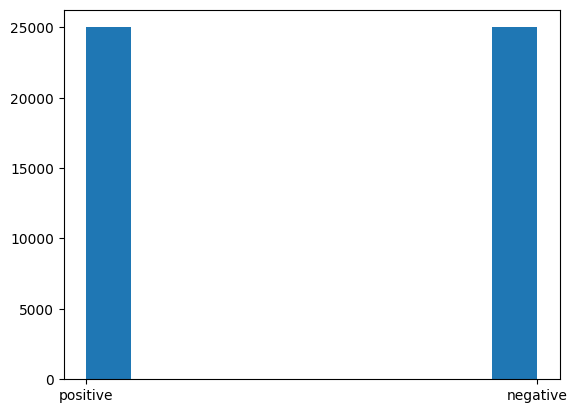

In [27]:
import matplotlib.pyplot as plt
plt.hist(data['sentiment'])

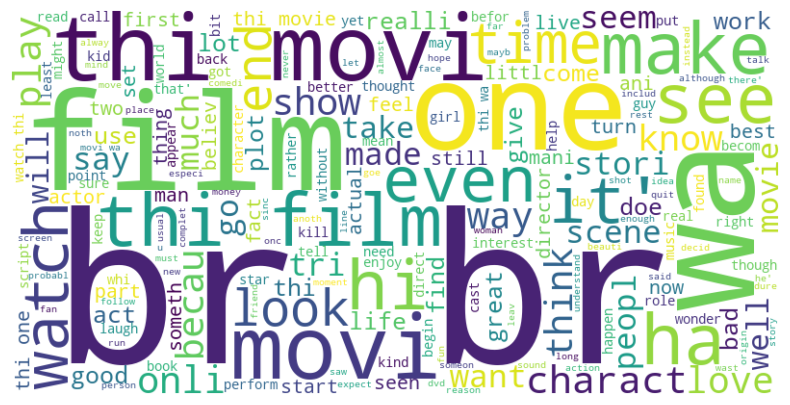

In [28]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all reviews into a single text
text = ' '.join(df['review'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
!pip install textblob
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

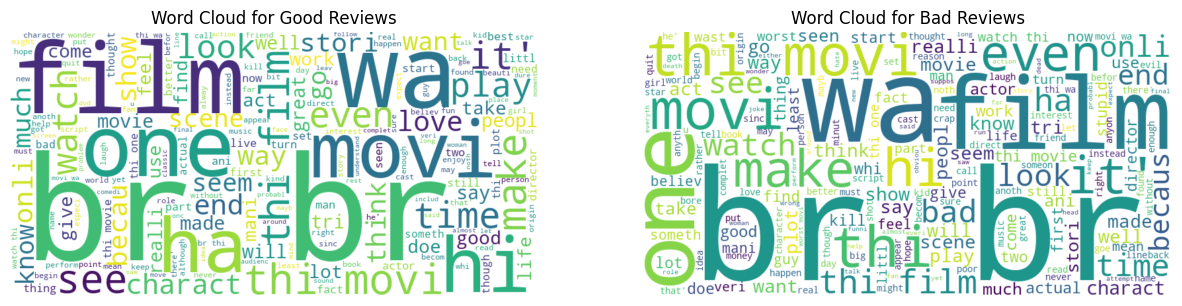

In [30]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob  # Sentiment analysis library

# Function to perform sentiment analysis
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return 'good' if analysis.sentiment.polarity > 0 else 'bad'

# Apply sentiment analysis to each review and create a new column 'sentiment'
df['sentiment'] = df['review'].apply(analyze_sentiment)

# Separate reviews into 'good' and 'bad' subsets
good_reviews = ' '.join(df[df['sentiment'] == 'good']['review'])
bad_reviews = ' '.join(df[df['sentiment'] == 'bad']['review'])

# Create WordClouds for 'good' and 'bad' reviews
wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(good_reviews)
wordcloud_bad = WordCloud(width=800, height=400, background_color='white').generate(bad_reviews)

# Display WordClouds using matplotlib
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.title('Word Cloud for Good Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title('Word Cloud for Bad Reviews')
plt.axis('off')

plt.show()


# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [45]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 89.19%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.89      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [46]:
!pip install seaborn

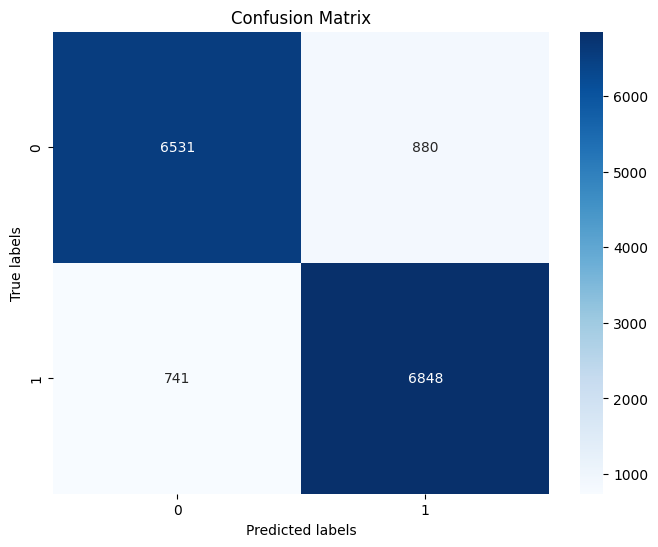

In [47]:
#Confusion matrix 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

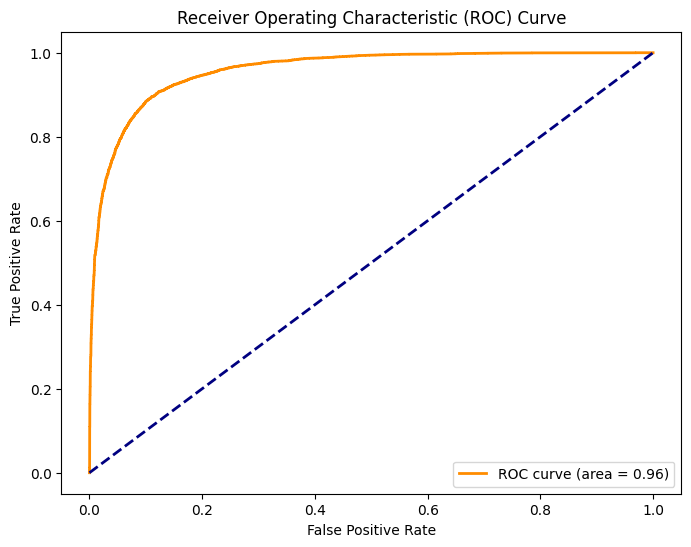

In [48]:
#ROC CURVE

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


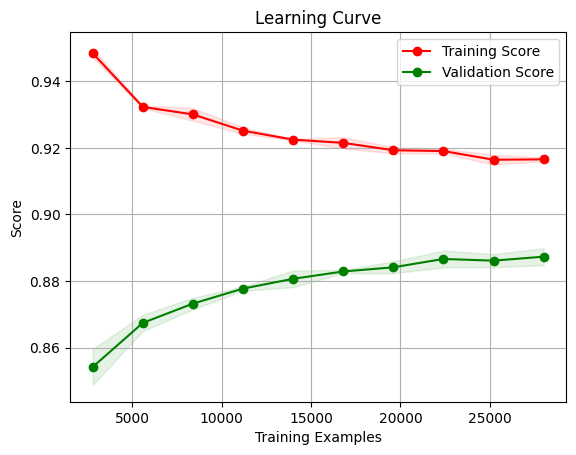

In [50]:
#LEARNING CURVE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with the best hyperparameters found in grid search.
best_logistic_regression = LogisticRegression(**best_params)

# Define a function to plot learning curves.
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        validation_scores_mean - validation_scores_std,
        validation_scores_mean + validation_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training Score")
    plt.plot(
        train_sizes,
        validation_scores_mean,
        "o-",
        color="g",
        label="Validation Score",
    )

    plt.legend(loc="best")
    return plt

# Specify the training sizes for the learning curve.
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curve.
plot_learning_curve(best_logistic_regression, X_train, y_train, cv=5, train_sizes=train_sizes)
plt.show()


# RANDOM FOREST



In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.8506

Confusion Matrix:
[[6379 1032]
 [1209 6380]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7411
           1       0.86      0.84      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



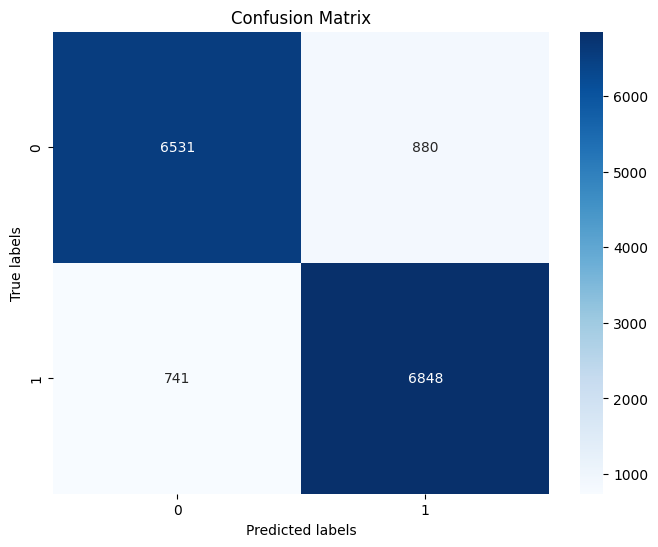

In [59]:
#CONFUSION MATRIX 

#rf_classifier  = confusion_matrix(y_test, y_pred)
# Plot confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


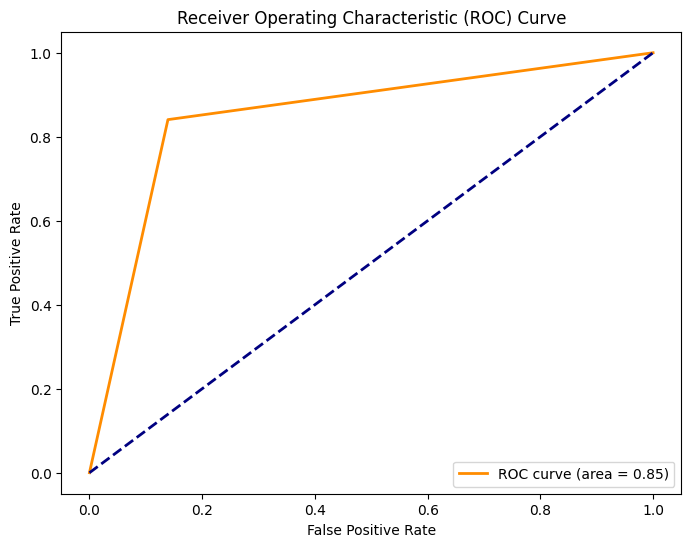

In [60]:
#ROC CURVE

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Assuming you have obtained the best hyperparameters from grid search
best_params = {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

# Create a logistic regression model with the best hyperparameters found in grid search.
best_logistic_regression = LogisticRegression(**best_params)

In [ ]:
#CV SCORE 

from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X and y are your feature matrix and target variable
# Make sure rf_classifier is trained on your data before using cross_val_score

# Perform 5-fold cross-validation and use accuracy as the scoring metric
cv_scores = cross_val_score(rf_classifier, X, y , cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can experiment with different parameters
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


In [ ]:
#ROC CURVE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Get predicted probabilities for the positive class
y_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#CV SCORE

from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X and y are your feature matrix and target variable
# Make sure rf_classifier is trained on your data before using cross_val_score

# Perform 5-fold cross-validation and use accuracy as the scoring metric
cv_scores = cross_val_score(svm_classifier, X, y , cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))